In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [236]:
os.chdir(os.getcwd())

In [237]:
df = pd.read_csv('train.csv')

In [238]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
df.shape

(891, 12)

In [240]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [241]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [242]:
correlation = df.corr()

In [243]:
correlation = correlation * 100

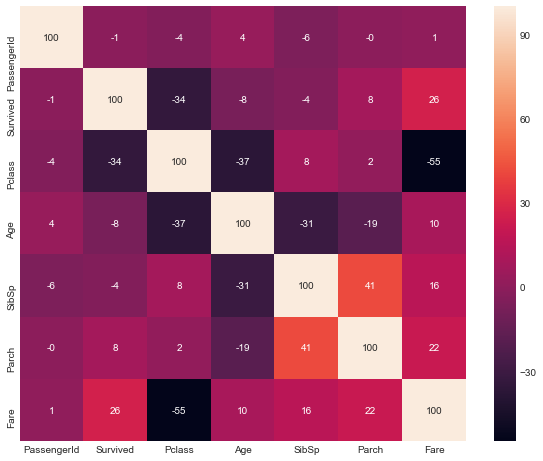

In [244]:
plt.figure(figsize=(10,8))

sns.set_style(style='white')

sns.heatmap(correlation,annot=True,fmt='.0f')
plt.show()

In [245]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [246]:
df.Embarked[df.Embarked.isnull()] ='C'

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [247]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [248]:
x = df.Name
l1 = list(x)
l2 = []

y = df.Age
m = list(y)
n = []

for i in df.index:
    if math.isnan(m[i]):
        continue
    else:
        n.append(m[i])
        l2.append(l1[i])

In [249]:
#For Female

sumAgeMrs = 0
sumAgeMiss = 0
countMrs =  0
countMiss = 0
c = -1


for i in l2:
    c += 1
    if 'Mrs.' in i:
        sumAgeMrs = sumAgeMrs + n[c]
        countMrs += 1
    elif 'Miss' in i:
        sumAgeMiss = sumAgeMiss + n[c]
        countMiss += 1  
        
print('Age Mrs : ',sumAgeMrs ,'count = ',countMrs)
print('Age Miss : ',sumAgeMiss ,'count = ',countMiss)

Age Mrs :  3877.0 count =  108
Age Miss :  3179.0 count =  146


In [250]:
#For Male

sumAgeMr = 0
sumAgeMaster = 0
countMr =  0
countMaster = 0
c = -1


for i in l2:
    c += 1
    if 'Mr.' in i:
        sumAgeMr = sumAgeMr + n[c]
        countMr += 1
    elif 'Master' in i:
        sumAgeMaster = sumAgeMaster + n[c]
        countMaster += 1  
        
print('Age Mr : ',sumAgeMr ,'count = ',countMr)
print('Age Master : ',sumAgeMaster ,'count = ',countMaster)

Age Mr :  12882.5 count =  398
Age Master :  164.67000000000002 count =  36


In [251]:
df.Age[df['Name'].str.contains('Mrs') & df.Age.isnull()] = int(sumAgeMrs/countMrs)
df.Age[df['Name'].str.contains('Miss') & df.Age.isnull()] = int(sumAgeMiss/countMiss)
df.Age[df['Name'].str.contains('Mr') & df.Age.isnull()] = int(sumAgeMr/countMr)
df.Age[df['Name'].str.contains('Master') & df.Age.isnull()] = int(sumAgeMaster/countMaster)
df.Age[df['Name'].str.contains('Dr') & df.Age.isnull()] = int(sumAgeMr/countMr)

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shub

In [252]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [253]:
sex = []

for i in df.Sex:
    if 'female' in i:
        sex.append(0)
    else:
        sex.append(1)

df.Sex = sex        

In [257]:
embarked = []

for i in df.Embarked:
    if 'S' in i:
        embarked.append(1)
    elif 'C' in i:
        embarked.append(2)
    else:
        embarked.append(3)
        
df.Embarked = embarked

In [258]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [261]:
x = df.iloc[:,[2,4,5,6,7,9,11]].values
y = df.iloc[:,1].values

In [265]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [267]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [268]:
y_pred = model.predict(x_test)

In [269]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [273]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[146,  22],
       [ 30,  70]], dtype=int64)

In [316]:
test = pd.read_csv('test.csv')

In [317]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [318]:
test.Fare[test.Fare.isnull()] = 7

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [319]:
x = test.Name
l1 = list(x)
l2 = []

y = test.Age
m = list(y)
n = []

for i in test.index:
    if math.isnan(m[i]):
        continue
    else:
        n.append(m[i])
        l2.append(l1[i])

In [320]:
#For Female

sumAgeMrs = 0
sumAgeMiss = 0
countMrs =  0
countMiss = 0
c = -1


for i in l2:
    c += 1
    if 'Mrs.' in i:
        sumAgeMrs = sumAgeMrs + n[c]
        countMrs += 1
    elif 'Miss' in i:
        sumAgeMiss = sumAgeMiss + n[c]
        countMiss += 1  
        
print('Age Mrs : ',sumAgeMrs ,'count = ',countMrs)
print('Age Miss : ',sumAgeMiss ,'count = ',countMiss)

Age Mrs :  2412.0 count =  62
Age Miss :  1393.5900000000001 count =  64


In [321]:
#For Male

sumAgeMr = 0
sumAgeMaster = 0
countMr =  0
countMaster = 0
c = -1


for i in l2:
    c += 1
    if 'Mr.' in i:
        sumAgeMr = sumAgeMr + n[c]
        countMr += 1
    elif 'Master' in i:
        sumAgeMaster = sumAgeMaster + n[c]
        countMaster += 1  
        
print('Age Mr : ',sumAgeMr ,'count = ',countMr)
print('Age Master : ',sumAgeMaster ,'count = ',countMaster)


Age Mr :  5856.0 count =  183
Age Master :  125.91 count =  17


In [322]:
test.Age[test['Name'].str.contains('Mrs') & test.Age.isnull()] = int(sumAgeMrs/countMrs)
test.Age[test['Name'].str.contains('Miss') & test.Age.isnull()] = int(sumAgeMiss/countMiss)
test.Age[test['Name'].str.contains('Ms') & test.Age.isnull()] = int(sumAgeMiss/countMiss)
test.Age[test['Name'].str.contains('Mr') & test.Age.isnull()] = int(sumAgeMr/countMr)
test.Age[test['Name'].str.contains('Master') & test.Age.isnull()] = int(sumAgeMaster/countMaster)
test.Age[test['Name'].str.contains('Dr') & test.Age.isnull()] = int(sumAgeMr/countMr)

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shub

In [323]:
sex = []

for i in test.Sex:
    if 'female' in i:
        sex.append(0)
    else:
        sex.append(1)

test.Sex = sex       

In [324]:
embarked = []

for i in test.Embarked:
    if 'S' in i:
        embarked.append(1)
    elif 'C' in i:
        embarked.append(2)
    else:
        embarked.append(3)
        
test.Embarked = embarked

In [325]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1


In [326]:
test1=test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x = test1.iloc[:,:].values

In [327]:
y_pred = model.predict(x)
test['Survived'] = pd.DataFrame(y_pred)

In [328]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,3,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1,1


In [329]:
test = test[['PassengerId','Survived']]

In [331]:
test.loc[test.Survived == 1].count()

PassengerId    152
Survived       152
dtype: int64

In [332]:
writer = pd.ExcelWriter('predict.xlsx')
test.to_excel(writer)
writer.save()